In [99]:
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from xgboost import XGBClassifier, DMatrix, plot_importance, plot_tree
from lightgbm import LGBMClassifier, Dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [105]:
catboost_params = {
    "iterations": 2000,
    "depth": 1, # 3
    "learning_rate": 0.07,
    "loss_function": "Logloss",
    "verbose": False,
    "eval_metric": 'AUC',
    "od_type": 'Iter',
    "od_wait": 300,
}

lr_params = {
    "C": 1.5,
    "fit_intercept": True,
    "max_iter": 300,
    "penalty": "l1",
    "random_state": 123,
    "solver": "liblinear"
}

catboost_columns = [
    'term',
    'acc_open_past_24mths', # 677 02
    'funded_amnt',
    'percent_per_year',
    'additional_dti', #671
    'num_accts_ever_120_pd',
    'annual_inc', # 682 024,
    'tot_hi_cred_lim',
    'purpose', # 6839 035
    'home_ownership', # 683 027
    
    'avg_cur_bal', # 684 041
    'mths_since_recent_inq',
]

catboost_cat_features = [
    'purpose',
    'home_ownership',
]

lr_cols = [
#     'percent_per_year',
#     'percent',
#     'term',
#     'loan_income_ratio',
#     'psk',
#     'additional_dti',
    
#     'purpose_small_business',
#     'purpose_home_improvement',
#     'purpose_major_purchase',
#     'purpose_medical',
#     'purpose_vacation',
#     'purpose_wedding',
#     'purpose_car',
    
#     'acc_open_past_24mths',
#     'num_accts_ever_120_pd',
    
#     'home_ownership_MORTGAGE',
#     'home_ownership_RENT',
    
#     'installment',
#     'is_first_loan',
#     'avg_cur_bal',
#     'is_emp_length_unknown',
#     'even_salary',
    
    
        
    'annual_inc',
    'acc_open_past_24mths',
    'term',
    'additional_dti',
    'tot_hi_cred_lim_log',
    'percent_per_year',
    'annual_inc_sqrt',
    'purpose_small_business',
    'is_emp_length_unknown',
    'is_not_sber_client',
    'purpose_vacation',
    'inq_last_6mths',
    'funded_amnt_mod_100',
    'num_accts_ever_120_pd',
]

lgbm_params = {
    'objective': 'binary',
    'max_depth': 1,
    'learning_rate': 0.05,
    'lambda_l2': 0.01,
    'seed': 17,
    'n_estimators': 1000,
    'min_child_weight': 40,
}

knn_params = {
    "n_neighbors": 130,
    "weights": 'distance',
}

knn_columns = [
    'percent_per_year',
    'percent',
    'term',
    'loan_income_ratio',
    'psk',
    'additional_dti',
    
    'purpose_small_business',
    'purpose_home_improvement',
    'purpose_major_purchase',
    'purpose_medical',
    'purpose_vacation',
    'purpose_wedding',
    'purpose_car',
    
    'acc_open_past_24mths',
    'num_accts_ever_120_pd',
    
    'home_ownership_MORTGAGE',
    'home_ownership_RENT',
    
    'installment',
    'is_first_loan',
    'avg_cur_bal',
    'is_emp_length_unknown',
    'even_salary',
]

lgbm_columns = [
    'percent',
    'acc_open_past_24mths',
    'avg_cur_bal',
    'loan_income_ratio',
    'annual_inc',
    'tot_hi_cred_lim',
    'additional_dti',
    'percent_per_year',
    'purpose',
    'dti',
    'home_ownership',
    'num_accts_ever_120_pd',
    'psk',
    'is_emp_length_unknown',
    'funded_amnt',
]

lgbm_cat_features = [
    'purpose',
    'home_ownership',
]

xgb_columns = [   
    'dti',
    'inq_last_6mths',
    'mths_since_recent_inq',
    'num_accts_ever_120_pd',
    'acc_open_past_24mths',
    'tot_hi_cred_lim',
    'purpose',
    'home_ownership',
    'psk',
    'percent',
    'loan_income_ratio',
    'is_emp_length_unknown',
    'funded_amnt_mod_100',   
]


xgb_params = {
    'max_depth': 1,
    'learning_rate': 0.1,
    'reg_alpha': 1,
    'reg_lambda': 10,
    'n_estimators': 1500,
}

nb_columns = [
    'percent',
    'annual_inc',
    'purpose_small_business',
    'percent_per_year',
    'additional_dti', 
    'avg_cur_bal_log',
]

bnb_columns = [
    'percent_per_year',
    'loan_income_ratio',
    'annual_inc_log',
    'percent',
    'home_ownership_RENT',
    'dti',
    'inq_last_6mths',
    'tot_hi_cred_lim',
    'funded_amnt_mod_100',
    'is_first_loan',
    'purpose_small_business',
    'num_accts_ever_120_pd',
]

rf_columns = [
    'residual_dti',
    'tot_hi_cred_lim_annual_inc_ratio',
    'funded_amnt_log',
    'dti_ratio_min',
    'mths_since_recent_inq',
    'tot_hi_cred_lim_funded_amnt_ratio',
    'waste_to_installment_ratio',
    'avg_cur_bal_log',
    'annual_inc',
    'tot_hi_cred_lim_sqrt',
    'acc_open_past_24mths_ratio',
    'inq_last_6mths',
    'tot_hi_cred_lim',
    'installment_log',
    'dti_sqrt',
    'annual_inc_log',
    'dti',
    'loan_income_ratio',
    'avg_cur_bal_sqrt',
    'additional_dti',
    'avg_cur_bal',
    'acc_open_past_24mths',
    'funded_amnt_mod_100',
    'annual_inc_sqrt',
    'dti_log',
    'term',
    'psk',
    'percent',
    'percent_per_year'
]

rf_params = {
    'n_estimators': 100,
    'max_depth': 6,
}

In [106]:
def init_and_fit_model(x_train, x_test, y_train, y_test, params, cat_features, model):
    if model=='catboost':
        eval_dataset = Pool(x_test, y_test, cat_features)
        inner_model = CatBoostClassifier(**params)

        inner_model.fit(
            x_train,  
            y_train,
            cat_features,
            eval_set=eval_dataset,
            verbose=50,
            use_best_model=True,
        )
    elif model == 'logreg':
        inner_model = LogisticRegression(**params)
        inner_model.fit(x_train, y_train)
    elif model == 'lgbm':
        inner_model = LGBMClassifier(**params)
        inner_model.fit(
            x_train,  
            y_train,
            eval_set=[(x_test, y_test)],
            eval_metric='auc',
            verbose=100,
            early_stopping_rounds=50,
            categorical_feature=cat_features,
        )
    elif model == 'knn':
        inner_model = KNeighborsClassifier(**params)
        inner_model.fit(x_train, y_train)
    elif model == 'xgboost':
        inner_model = XGBClassifier(**params)

        inner_model.fit(
            x_train,  
            y_train,
            eval_set=[(x_test, y_test)],
            eval_metric='auc',
            verbose=100,
            early_stopping_rounds=150,
        )
    elif model == 'nb':
        inner_model = GaussianNB()
        inner_model.fit(x_train,y_train)
    elif model == 'bnb':
        inner_model = BernoulliNB()
        inner_model.fit(x_train, y_train)
    elif model == 'rf':
        inner_model = RandomForestClassifier(**params, random_state=17)
        inner_model.fit(x_train, y_train)
    return inner_model

def do_cv(x_train, x_test, y_train, features, cat_features, params, splitter, model='catboost'):
    oof_result = pd.Series([0] * x_train.shape[0], index=x_train.index)
    result = [0] * x_test.shape[0]
    scores = []
    for ind_trn, ind_test in splitter.split(x_train, y_train):
        X_train_df = x_train[features].iloc[ind_trn]
        X_valid_df = x_train[features].iloc[ind_test]
        y_train_df = y_train.iloc[ind_trn]
        y_valid_df = y_train.iloc[ind_test]

        fitted_model = init_and_fit_model(
            X_train_df,
            X_valid_df,
            y_train_df,
            y_valid_df,
            params,
            cat_features,
            model
        )
        
        scores.append(roc_auc_score(y_valid_df, fitted_model.predict_proba(X_valid_df)[:, 1]))
        result += fitted_model.predict_proba(x_test[features])[:, 1:].flatten()/5
        oof_result.loc[X_valid_df.index] = fitted_model.predict_proba(X_valid_df)[:, 1]
        
    return scores, result, oof_result

In [107]:
catboost_train = pd.read_csv('data/catboost_train.csv')
catboost_test = pd.read_csv('data/catboost_test.csv')
lgbm_train = pd.read_csv('data/catboost_train.csv')
lgbm_test = pd.read_csv('data/catboost_test.csv')
logreg_train = pd.read_csv('data/logreg_train.csv')
logreg_test = pd.read_csv('data/logreg_test.csv')

In [108]:
cat_cols = [
    'purpose',
    'home_ownership',
    'subgrade'
]

for cat_cols in cat_cols:
    le = LabelEncoder()
    lgbm_train[cat_cols] = le.fit_transform(lgbm_train[cat_cols])
    lgbm_test[cat_cols] = le.transform(lgbm_test[cat_cols])

In [109]:
catboost_train_small, catboost_valid, catboost_y_train, catboost_y_valid = train_test_split(
    catboost_train.drop(columns=['def'], axis=1),
    catboost_train['def'],
    test_size=0.2,
    random_state=18,
    stratify=catboost_train['def']
)

logreg_train_small = logreg_train.loc[catboost_train_small.index].drop(columns=['def'], axis=1).copy()
logreg_valid = logreg_train.loc[catboost_valid.index].drop(columns=['def'], axis=1).copy()
logreg_y_train = logreg_train.loc[catboost_train_small.index]['def']
logreg_y_valid = logreg_train.loc[catboost_valid.index]['def']

lgbm_train_small = lgbm_train.loc[catboost_train_small.index].drop(columns=['def'], axis=1).copy()
lgbm_valid = lgbm_train.loc[catboost_valid.index].drop(columns=['def'], axis=1).copy()
lgbm_y_train = lgbm_train.loc[catboost_train_small.index]['def']
lgbm_y_valid = lgbm_train.loc[catboost_valid.index]['def']

xgb_train_small = lgbm_train.loc[catboost_train_small.index].drop(columns=['def'], axis=1).copy()
xgb_valid = lgbm_train.loc[catboost_valid.index].drop(columns=['def'], axis=1).copy()
xgb_y_train = lgbm_train.loc[catboost_train_small.index]['def']
xgb_y_valid = lgbm_train.loc[catboost_valid.index]['def']

knn_train_small = logreg_train.loc[catboost_train_small.index].drop(columns=['def'], axis=1).copy()
knn_valid = logreg_train.loc[catboost_valid.index].drop(columns=['def'], axis=1).copy()
knn_y_train = logreg_train.loc[catboost_train_small.index]['def']
knn_y_valid = logreg_train.loc[catboost_valid.index]['def']

In [14]:
logreg_train_small['pu']

,installment,dti,funded_amnt,annual_inc,emp_length,term,inq_last_6mths,mths_since_recent_inq,delinq_2yrs,chargeoff_within_12_mths,...,dti_log,dti_sqrt,funded_amnt_log,funded_amnt_sqrt,annual_inc_log,annual_inc_sqrt,avg_cur_bal_log,avg_cur_bal_sqrt,tot_hi_cred_lim_log,tot_hi_cred_lim_sqrt
14109,-0.760234,0.025343,-0.810075,-1.039130,3.0,36,1,6.0,0,0,...,0.227771,0.143908,-0.654416,-0.775364,-1.848002,-1.464059,-1.261001,-1.081577,-1.172011,-1.080745
18950,-0.222480,1.945797,-0.324765,-0.503243,10.0,36,0,8.0,0,0,...,1.173022,1.651922,-0.029822,-0.191736,-0.487254,-0.538172,0.304890,0.042410,0.786712,0.682507
3675,2.615339,0.663334,1.555813,-0.197830,7.0,36,0,11.0,0,0,...,0.609219,0.697832,1.247633,1.442475,0.004961,-0.115963,-0.431614,-0.613507,-0.370140,-0.565604
16429,0.286792,-0.036900,0.645856,0.032645,10.0,60,3,6.0,0,0,...,0.185001,0.085937,0.757075,0.733766,0.308733,0.172286,0.855537,0.754704,1.036138,1.065215
13475,1.235710,-0.294948,1.616476,0.268435,1.0,60,0,9.0,0,0,...,-0.006076,-0.163514,1.275390,1.486047,0.577408,0.446495,0.323842,0.063302,0.896247,0.844462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,-0.000362,-1.622798,-0.033579,0.161258,10.0,36,1,6.0,0,0,...,-1.746366,-1.849673,0.251034,0.111826,0.459819,0.324172,-1.637369,-1.229672,-1.427632,-1.204585
5861,1.982058,0.490869,1.616476,1.153078,10.0,36,1,2.0,0,0,...,0.514994,0.554609,1.275390,1.486047,1.346889,1.344089,1.045365,1.058515,1.388063,1.697275
26451,-0.935715,1.303917,-0.567420,0.032645,8.0,60,2,1.0,0,0,...,0.916299,1.195954,-0.310677,-0.468848,0.308733,0.172286,-0.003399,-0.266825,0.642415,0.482795
2572,-0.720810,-0.420731,-0.810075,-0.996259,3.0,36,0,10.0,0,0,...,-0.108496,-0.291034,-0.654416,-0.775364,-1.696916,-1.376367,-0.810724,-0.855711,-1.452015,-1.215558


In [113]:
skf = StratifiedKFold(n_splits=5, random_state=18, shuffle=True)
cb_scores, cb_result, cb_oof_result = do_cv(
    catboost_train_small,
    catboost_valid,
    catboost_y_train,
    catboost_columns,
    catboost_cat_features,
    catboost_params,
    skf,
    'catboost'
)

rf_scores, rf_result, rf_oof_result = do_cv(
    logreg_train_small,
    logreg_valid,
    logreg_y_train,
    rf_columns,
    [],
    rf_params,
    skf,
    'rf',
)

lr_scores, lr_result, lr_oof_result = do_cv(
    logreg_train_small,
    logreg_valid,
    logreg_y_train,
    lr_cols,
    [],
    lr_params,
    skf,
    'logreg',
)

skf = StratifiedKFold(n_splits=5, random_state=21, shuffle=True)
lgbm_scores, lgbm_result, lgbm_oof_result = do_cv(
    lgbm_train_small,
    lgbm_valid,
    lgbm_y_train,
    lgbm_columns,
    lgbm_cat_features,
    lgbm_params,
    skf,
    'lgbm'
)

knn_scores, knn_result, knn_oof_result = do_cv(
    knn_train_small,
    knn_valid,
    knn_y_train,
    knn_columns,
    [],
    knn_params,
    skf,
    'knn'
)

xgb_scores, xgb_result, xgb_oof_result = do_cv(
    xgb_train_small,
    xgb_valid,
    xgb_y_train,
    xgb_columns,
    [],
    xgb_params,
    skf,
    'xgboost'
)

nb_scores, nb_result, nb_oof_result = do_cv(
    logreg_train_small,
    logreg_valid,
    logreg_y_train,
    nb_columns,
    [],
    {},
    skf,
    'nb'
)

bnb_scores, bnb_result, bnb_oof_result = do_cv(
    logreg_train_small,
    logreg_valid,
    logreg_y_train,
    bnb_columns,
    [],
    {},
    skf,
    'bnb'
)

0:	test: 0.5588047	best: 0.5588047 (0)	total: 7.56ms	remaining: 15.1s
50:	test: 0.6755376	best: 0.6759468 (45)	total: 844ms	remaining: 32.2s
100:	test: 0.6802920	best: 0.6803718 (98)	total: 1.7s	remaining: 32s
150:	test: 0.6827682	best: 0.6827682 (150)	total: 2.33s	remaining: 28.6s
200:	test: 0.6836296	best: 0.6836296 (200)	total: 2.9s	remaining: 26s
250:	test: 0.6837138	best: 0.6841565 (237)	total: 3.57s	remaining: 24.9s
300:	test: 0.6836217	best: 0.6841565 (237)	total: 4.08s	remaining: 23s
350:	test: 0.6834382	best: 0.6841565 (237)	total: 4.72s	remaining: 22.2s
400:	test: 0.6831270	best: 0.6841565 (237)	total: 5.32s	remaining: 21.2s
450:	test: 0.6830985	best: 0.6841565 (237)	total: 5.87s	remaining: 20.2s
500:	test: 0.6830577	best: 0.6841565 (237)	total: 6.8s	remaining: 20.3s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.6841565004
bestIteration = 237

Shrink model to first 238 iterations.
0:	test: 0.5456950	best: 0.5456950 (0)	total: 7.84ms	remaining: 15.7s
50:

d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.688404	valid_0's binary_logloss: 0.413602
[200]	valid_0's auc: 0.691765	valid_0's binary_logloss: 0.411208
[300]	valid_0's auc: 0.693245	valid_0's binary_logloss: 0.410451
[400]	valid_0's auc: 0.69427	valid_0's binary_logloss: 0.410068
Early stopping, best iteration is:
[390]	valid_0's auc: 0.69437	valid_0's binary_logloss: 0.41004


d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.697626	valid_0's binary_logloss: 0.411719
[200]	valid_0's auc: 0.702557	valid_0's binary_logloss: 0.40832
[300]	valid_0's auc: 0.703573	valid_0's binary_logloss: 0.407186
[400]	valid_0's auc: 0.704416	valid_0's binary_logloss: 0.40653
[500]	valid_0's auc: 0.704719	valid_0's binary_logloss: 0.406245
Early stopping, best iteration is:
[464]	valid_0's auc: 0.704745	valid_0's binary_logloss: 0.406303
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01


d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.677319	valid_0's binary_logloss: 0.415939
[200]	valid_0's auc: 0.681535	valid_0's binary_logloss: 0.413448
[300]	valid_0's auc: 0.684394	valid_0's binary_logloss: 0.412425
[400]	valid_0's auc: 0.685134	valid_0's binary_logloss: 0.412154
[500]	valid_0's auc: 0.68564	valid_0's binary_logloss: 0.412011
Early stopping, best iteration is:
[531]	valid_0's auc: 0.685763	valid_0's binary_logloss: 0.411991


d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.667136	valid_0's binary_logloss: 0.417184
[200]	valid_0's auc: 0.672391	valid_0's binary_logloss: 0.41463
[300]	valid_0's auc: 0.675438	valid_0's binary_logloss: 0.413633
[400]	valid_0's auc: 0.677164	valid_0's binary_logloss: 0.413103
[500]	valid_0's auc: 0.678098	valid_0's binary_logloss: 0.412779
[600]	valid_0's auc: 0.678805	valid_0's binary_logloss: 0.41259
[700]	valid_0's auc: 0.679152	valid_0's binary_logloss: 0.412478
[800]	valid_0's auc: 0.679329	valid_0's binary_logloss: 0.412443
[900]	valid_0's auc: 0.679414	valid_0's binary_logloss: 0.412402
Early stopping, best iteration is:
[872]	valid_0's auc: 0.679465	valid_0's binary_logloss: 0.412389


d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.658521	valid_0's binary_logloss: 0.41919
[200]	valid_0's auc: 0.663803	valid_0's binary_logloss: 0.417045
[300]	valid_0's auc: 0.666114	valid_0's binary_logloss: 0.416394
[400]	valid_0's auc: 0.667387	valid_0's binary_logloss: 0.416191
[500]	valid_0's auc: 0.667998	valid_0's binary_logloss: 0.416166
Early stopping, best iteration is:
[460]	valid_0's auc: 0.667912	valid_0's binary_logloss: 0.416133
[0]	validation_0-auc:0.62668
Will train until validation_0-auc hasn't improved in 150 rounds.
[100]	validation_0-auc:0.69255
[200]	validation_0-auc:0.69516
[300]	validation_0-auc:0.69605
[400]	validation_0-auc:0.69668
[500]	validation_0-auc:0.69673
[600]	validation_0-auc:0.69659
Stopping. Best iteration:
[510]	validation_0-auc:0.69681

[0]	validation_0-auc:0.63619
Will train until validation_0-auc hasn't i

In [154]:
new_train_df = pd.DataFrame({
    'lr':lr_oof_result,
    'cb':cb_oof_result,
    'lgbm': lgbm_oof_result,
    'knn': knn_oof_result,
    'xgb': xgb_oof_result,
    'nb': nb_oof_result,
    'bnb': bnb_oof_result,
    'rf': rf_oof_result,
})
new_test_df = pd.DataFrame({
    'lr':lr_result,
    'cb':cb_result,
    'lgbm': lgbm_result,
    'knn': knn_result,
    'xgb': xgb_result,
    'nb': nb_result,
    'bnb': bnb_result,
    'rf': rf_result,
})

In [155]:
new_train_df.corr()

,lr,cb,lgbm,knn,xgb,nb,bnb,rf
lr,1.000000,0.952955,0.943089,0.853904,0.945714,0.834024,0.826774,0.912999
cb,0.952955,1.000000,0.973011,0.876181,0.957213,0.781855,0.838195,0.948438
lgbm,0.943089,0.973011,1.000000,0.881803,0.969909,0.773171,0.835036,0.946014
knn,0.853904,0.876181,0.881803,1.000000,0.871901,0.686024,0.729342,0.876031
xgb,0.945714,0.957213,0.969909,0.871901,1.000000,0.757269,0.832385,0.931601
nb,0.834024,0.781855,0.773171,0.686024,0.757269,1.000000,0.673341,0.747278
bnb,0.826774,0.838195,0.835036,0.729342,0.832385,0.673341,1.000000,0.839973
rf,0.912999,0.948438,0.946014,0.876031,0.931601,0.747278,0.839973,1.000000


In [156]:
roc_auc_score(catboost_y_valid, new_test_df.mean(axis=1))

0.6838919530418333

In [157]:
roc_auc_score(catboost_y_valid, new_test_df.mean(axis=1))

0.6838919530418333

In [158]:
metamodel = LogisticRegression(C=1, solver='liblinear')
metamodel.fit(new_train_df, logreg_y_train)

LogisticRegression(C=1, solver='liblinear')

In [159]:
roc_auc_score(logreg_y_valid, metamodel.predict_proba(new_test_df)[:, 1])

0.6855250083218256

In [160]:
roc_auc_score(catboost_y_valid, new_test_df.mean(axis=1))

0.6838919530418333

In [161]:
for col in new_train_df:
    print(col, roc_auc_score(logreg_y_train, new_train_df[col]),  roc_auc_score(logreg_y_valid, new_test_df[col]))

lr 0.688146134966363 0.6839071959897041
cb 0.6849498421240299 0.6841684889542183
lgbm 0.6860472346701304 0.6839088438759603
knn 0.6670077776969623 0.667772329682716
xgb 0.6885567370580233 0.685031466388064
nb 0.6755266804753127 0.6723031929444102
bnb 0.6703509347500038 0.6670671373579109
rf 0.6788572004501578 0.6796185720076858


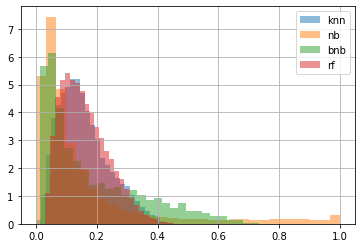

In [179]:
# new_train_df['lr'].hist(alpha=0.5, bins=30, density='uniform', label='lr')
# new_train_df['cb'].hist(alpha=0.5, bins=30, density='uniform', label='cb')
# new_train_df['lgbm'].hist(alpha=0.5, bins=30, density='uniform', label='lgbm')
new_train_df['knn'].hist(alpha=0.5, bins=30, density='uniform', label='knn')
# new_train_df['xgb'].hist(alpha=0.5, bins=30, density='uniform', label='xgb')
new_train_df['nb'].hist(alpha=0.5, bins=30, density='uniform', label='nb')
new_train_df['bnb'].hist(alpha=0.5, bins=30, density='uniform', label='bnb')
new_train_df['rf'].hist(alpha=0.5, bins=30, density='uniform', label='rf')
plt.legend()
plt.show()



In [164]:
skf = StratifiedKFold(n_splits=5, random_state=18, shuffle=True)
cb_scores, cb_result, cb_oof_result = do_cv(
    catboost_train,
    catboost_test,
    catboost_train['def'],
    catboost_columns,
    catboost_cat_features,
    catboost_params,
    skf,
    'catboost'
)

lr_scores, lr_result, lr_oof_result = do_cv(
    logreg_train,
    logreg_test,
    logreg_train['def'],
    lr_cols,
    [],
    lr_params,
    skf,
    'logreg',
)

rf_scores, rf_result, rf_oof_result = do_cv(
    logreg_train,
    logreg_test,
    logreg_train['def'],
    rf_columns,
    [],
    rf_params,
    skf,
    'rf',
)

skf = StratifiedKFold(n_splits=5, random_state=21, shuffle=True)
lgbm_scores, lgbm_result, lgbm_oof_result = do_cv(
    lgbm_train,
    lgbm_test,
    lgbm_train['def'],
    lgbm_columns,
    lgbm_cat_features,
    lgbm_params,
    skf,
    'lgbm'
)

knn_scores, knn_result, knn_oof_result = do_cv(
    logreg_train,
    logreg_test,
    logreg_train['def'],
    knn_columns,
    [],
    knn_params,
    skf,
    'knn'
)

xgb_scores, xgb_result, xgb_oof_result = do_cv(
    lgbm_train,
    lgbm_test,
    lgbm_train['def'],
    xgb_columns,
    [],
    xgb_params,
    skf,
    'xgboost'
)

nb_scores, nb_result, nb_oof_result = do_cv(
    logreg_train,
    logreg_test,
    logreg_train['def'],
    nb_columns,
    [],
    {},
    skf,
    'nb'
)

bnb_scores, bnb_result, bnb_oof_result = do_cv(
    logreg_train,
    logreg_test,
    logreg_train['def'],
    bnb_columns,
    [],
    {},
    skf,
    'bnb'
)

0:	test: 0.5857115	best: 0.5857115 (0)	total: 8.64ms	remaining: 17.3s
50:	test: 0.6751409	best: 0.6751409 (50)	total: 700ms	remaining: 26.8s
100:	test: 0.6784232	best: 0.6784232 (100)	total: 1.32s	remaining: 24.8s
150:	test: 0.6796718	best: 0.6797019 (148)	total: 2.74s	remaining: 33.5s
200:	test: 0.6805855	best: 0.6806065 (196)	total: 3.49s	remaining: 31.2s
250:	test: 0.6813161	best: 0.6814115 (245)	total: 4.37s	remaining: 30.5s
300:	test: 0.6817810	best: 0.6817810 (300)	total: 5.17s	remaining: 29.2s
350:	test: 0.6819690	best: 0.6820050 (339)	total: 5.85s	remaining: 27.5s
400:	test: 0.6822003	best: 0.6822279 (381)	total: 6.69s	remaining: 26.7s
450:	test: 0.6818511	best: 0.6822646 (408)	total: 7.28s	remaining: 25s
500:	test: 0.6817657	best: 0.6822646 (408)	total: 8.43s	remaining: 25.2s
550:	test: 0.6816674	best: 0.6822646 (408)	total: 9.27s	remaining: 24.4s
600:	test: 0.6816452	best: 0.6822646 (408)	total: 10s	remaining: 23.3s
650:	test: 0.6815363	best: 0.6822646 (408)	total: 10.7s	rema

d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.679046	valid_0's binary_logloss: 0.414826
[200]	valid_0's auc: 0.685137	valid_0's binary_logloss: 0.411815
[300]	valid_0's auc: 0.687682	valid_0's binary_logloss: 0.410779
[400]	valid_0's auc: 0.688772	valid_0's binary_logloss: 0.410315
[500]	valid_0's auc: 0.689324	valid_0's binary_logloss: 0.410116
[600]	valid_0's auc: 0.689504	valid_0's binary_logloss: 0.410033
Early stopping, best iteration is:
[609]	valid_0's auc: 0.689591	valid_0's binary_logloss: 0.410005


d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.669306	valid_0's binary_logloss: 0.417016
[200]	valid_0's auc: 0.674696	valid_0's binary_logloss: 0.414368
[300]	valid_0's auc: 0.677481	valid_0's binary_logloss: 0.413318
[400]	valid_0's auc: 0.679048	valid_0's binary_logloss: 0.412805
[500]	valid_0's auc: 0.679525	valid_0's binary_logloss: 0.412636
[600]	valid_0's auc: 0.68001	valid_0's binary_logloss: 0.412544
[700]	valid_0's auc: 0.680248	valid_0's binary_logloss: 0.41251
Early stopping, best iteration is:
[730]	valid_0's auc: 0.680304	valid_0's binary_logloss: 0.412499


d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.685132	valid_0's binary_logloss: 0.413818
[200]	valid_0's auc: 0.6905	valid_0's binary_logloss: 0.41052
[300]	valid_0's auc: 0.692507	valid_0's binary_logloss: 0.409232
[400]	valid_0's auc: 0.693482	valid_0's binary_logloss: 0.408596
[500]	valid_0's auc: 0.693762	valid_0's binary_logloss: 0.408294
[600]	valid_0's auc: 0.693882	valid_0's binary_logloss: 0.40818
Early stopping, best iteration is:
[637]	valid_0's auc: 0.693936	valid_0's binary_logloss: 0.408138


d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.672897	valid_0's binary_logloss: 0.416669
[200]	valid_0's auc: 0.676405	valid_0's binary_logloss: 0.414635
[300]	valid_0's auc: 0.677927	valid_0's binary_logloss: 0.414109
[400]	valid_0's auc: 0.678992	valid_0's binary_logloss: 0.413868
Early stopping, best iteration is:
[430]	valid_0's auc: 0.67919	valid_0's binary_logloss: 0.413826


d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['home_ownership', 'purpose']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
d:\kaggle\sber_plus_nsu\.venv\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.685103	valid_0's binary_logloss: 0.414352
[200]	valid_0's auc: 0.689529	valid_0's binary_logloss: 0.411554
[300]	valid_0's auc: 0.692146	valid_0's binary_logloss: 0.410412
[400]	valid_0's auc: 0.693724	valid_0's binary_logloss: 0.409799
[500]	valid_0's auc: 0.693945	valid_0's binary_logloss: 0.409642
[600]	valid_0's auc: 0.694107	valid_0's binary_logloss: 0.409573
Early stopping, best iteration is:
[600]	valid_0's auc: 0.694107	valid_0's binary_logloss: 0.409573
[0]	validation_0-auc:0.61749
Will train until validation_0-auc hasn't improved in 150 rounds.
[100]	validation_0-auc:0.68140
[200]	validation_0-auc:0.68586
[300]	validation_0-auc:0.68772
[400]	validation_0-auc:0.68861
[500]	validation_0-auc:0.68900
[600]	validation_0-auc:0.68933
[700]	validation_0-auc:0.68937
Stopping. Best iteration:
[646]	

In [209]:
new_train_df = pd.DataFrame({
    'lr':lr_oof_result,
#     'cb':cb_oof_result,
#     'lgbm': lgbm_oof_result,
    'knn': knn_oof_result,
    'xgb': xgb_oof_result,
#     'nb': nb_oof_result,
    'bnb': bnb_oof_result,
#     'rf': rf_oof_result,
})
new_test_df = pd.DataFrame({
    'lr':lr_result,
#     'cb':cb_result,
#     'lgbm': lgbm_result,
    'knn': knn_result,
    'xgb': xgb_result,
#     'nb': nb_result,
    'bnb': bnb_result,
#     'rf': rf_result,
})

In [168]:
new_train_df.corr()

,lr,cb,lgbm,knn,xgb,nb,bnb,rf
lr,1.000000,0.955907,0.950892,0.861912,0.951192,0.833463,0.828142,0.922287
cb,0.955907,1.000000,0.976271,0.881368,0.962373,0.782379,0.843666,0.948488
lgbm,0.950892,0.976271,1.000000,0.886302,0.973027,0.784443,0.840470,0.953160
knn,0.861912,0.881368,0.886302,1.000000,0.880375,0.703157,0.741445,0.888458
xgb,0.951192,0.962373,0.973027,0.880375,1.000000,0.766113,0.833108,0.941006
nb,0.833463,0.782379,0.784443,0.703157,0.766113,1.000000,0.668727,0.760955
bnb,0.828142,0.843666,0.840470,0.741445,0.833108,0.668727,1.000000,0.848054
rf,0.922287,0.948488,0.953160,0.888458,0.941006,0.760955,0.848054,1.000000


In [210]:
roc_auc_score(logreg_train['def'], new_train_df.mean(axis=1))

0.6841012192278493

In [94]:
roc_auc_score(logreg_train['def'], new_train_df.mean(axis=1))

0.687314277549159

In [182]:
for col in new_train_df:
    print(col, roc_auc_score(logreg_train['def'], new_train_df[col]))

lr 0.6873151094526342
knn 0.6680741128144796
xgb 0.6882096363151927
nb 0.675285657532718
bnb 0.6698103942072634
rf 0.6801294237538061


In [211]:
lr = LogisticRegression(C=1, solver='liblinear')
scores = cross_val_score(lr, new_train_df, logreg_train['def'], cv=5, scoring='roc_auc')

In [212]:
np.mean(scores), np.std(scores)

(0.6879745708267919, 0.008678457844296293)

In [208]:
np.mean(scores), np.std(scores)

(0.6886839567114981, 0.008724017587308772)

In [200]:
np.mean(scores), np.std(scores)

(0.6883080283784689, 0.008565744849149667)

In [173]:
np.mean(scores), np.std(scores)

(0.6877973808591653, 0.007412040467355528)

In [174]:
lr_f_scores, lr_f_result, lr_f_oof_result = do_cv(
    new_train_df,
    new_test_df,
    logreg_train['def'],
    new_train_df.columns,
    [],
    {},
    skf,
    'logreg',
)

In [175]:
logreg_test['prob'] = lr_f_result

In [176]:
logreg_test[['id', 'prob']].to_csv('blend_submission.csv', index=False)